In [76]:
import os
import numpy as np
from sklearn.decomposition import PCA
import random
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../src/')
from config import raw_data_path, univariate_data_path, processed_data_path
from scipy.signal import resample


In [77]:
dataset = 'tpehgdb'

In [78]:
import os
import numpy as np
from sklearn.decomposition import PCA

def univariate(dataset_name):
    data_dir = os.path.join(processed_data_path, dataset_name + "_preprocessed.npy")
    data = np.load(data_dir, allow_pickle=True)

    # Define the path to save the new dataset
    

    # Initialize a list for storing modified entries
    univariate_data = []
    retained_variances = []  # List to store retained variance for each entry

    for entry in data:
        # Copy the entry to preserve metadata
        new_entry = entry.copy()

        # Extract the signal matrix (shape: (599999, 6))
        signal_matrix = entry['signal']
        
        # Apply PCA to reduce from 6D to 1D
        pca = PCA(n_components=1)
        reduced_signal = pca.fit_transform(signal_matrix)  # Shape: (599999, 1)
        
        # Calculate retained variance
        retained_variance = np.sum(pca.explained_variance_ratio_)
        retained_variances.append(retained_variance)

        print(f"Retained Variance for {entry['record_name']}: {retained_variance:.6f}")
        
        # Flatten to (599999,) to retain time-series format
        new_entry['signal'] = reduced_signal.flatten()

        # Append modified entry to the new dataset
        univariate_data.append(new_entry)

    # Compute the average retained variance for the dataset
    avg_retained_variance = np.mean(retained_variances)
    print(f"\nAverage Retained Variance for {dataset_name}: {avg_retained_variance:.6f}")

    # Convert to a NumPy array and save
    
    return univariate_data

univariate_data = univariate(dataset)


Retained Variance for tpehg1007: 0.695447
Retained Variance for tpehg1021: 0.499589
Retained Variance for tpehg1022: 0.601662
Retained Variance for tpehg1027: 0.551454
Retained Variance for tpehg1029: 0.665002
Retained Variance for tpehg1031: 0.596371
Retained Variance for tpehg1039: 0.663107
Retained Variance for tpehg1065: 0.692467
Retained Variance for tpehg1070: 0.762815
Retained Variance for tpehg1088: 0.473710
Retained Variance for tpehg1089: 0.693878
Retained Variance for tpehg1093: 0.499092
Retained Variance for tpehg1097: 0.555360
Retained Variance for tpehg1113: 0.667000
Retained Variance for tpehg1116: 0.548000
Retained Variance for tpehg1118: 0.649151
Retained Variance for tpehg1119: 0.844441
Retained Variance for tpehg1120: 0.405294
Retained Variance for tpehg1121: 0.775090
Retained Variance for tpehg1128: 0.537854
Retained Variance for tpehg1130: 0.594345
Retained Variance for tpehg1132: 0.563712
Retained Variance for tpehg1134: 0.487625
Retained Variance for tpehg1136: 0

In [79]:

def downsample_signal(univariate_data, target_fs=20):
    """
    Downsamples all signals in univariate_data to the target frequency (default: 20Hz).
    
    Parameters:
    - univariate_data (list of dicts): Each entry should have 'metadata' with 'fs' (sampling rate) and 'signal'.
    - target_fs (int): The target sampling frequency (default is 20 Hz).
    
    Returns:
    - downsampled_data (list of dicts): Same structure as input but with downsampled signals.
    """
    downsampled_data = []
    
    for entry in univariate_data:
        original_fs = entry['metadata']['fs']
        signal = entry['signal']
        
        # Compute the new length after downsampling
        new_length = int(len(signal) * target_fs / original_fs)
        print(target_fs, original_fs)
        print(len(signal), new_length)
        
        # Resample the signal
        downsampled_signal = resample(signal, new_length)
        
        # Store the downsampled signal with updated metadata
        downsampled_entry = {
            'metadata': {**entry['metadata'], 'fs': target_fs},
            'signal': downsampled_signal,
            'record_name': entry['record_name']
        }
        downsampled_data.append(downsampled_entry)
    save_dir = os.path.join(univariate_data_path, dataset + "_univariate.npy")
    np.save(save_dir, np.array(univariate_data, dtype=object))

    print(f"PCA transformation complete. Saved as '{save_dir}'.")
    
    return downsampled_data

downsampled_data = downsample_signal(univariate_data)
print(len(univariate_data[1]['signal']))
print(len(downsampled_data[1]['signal']))

print(data[1])
print(downsampled_data[1])

20 20
32780 32780
20 20
32860 32860
20 20
32840 32840
20 20
32920 32920
20 20
32880 32880
20 20
32780 32780
20 20
32940 32940
20 20
32940 32940
20 20
32920 32920
20 20
32800 32800
20 20
32880 32880
20 20
32900 32900
20 20
32920 32920
20 20
32820 32820
20 20
32800 32800
20 20
32900 32900
20 20
32920 32920
20 20
32900 32900
20 20
32880 32880
20 20
32880 32880
20 20
32780 32780
20 20
32980 32980
20 20
32800 32800
20 20
32940 32940
20 20
32900 32900
20 20
32860 32860
20 20
32840 32840
20 20
32860 32860
20 20
32820 32820
20 20
32840 32840
20 20
32840 32840
20 20
32960 32960
20 20
32940 32940
20 20
32800 32800
20 20
32960 32960
20 20
32880 32880
20 20
32940 32940
20 20
32800 32800
20 20
32920 32920
20 20
32860 32860
20 20
32960 32960
20 20
32840 32840
20 20
33060 33060
20 20
32920 32920
20 20
32840 32840
20 20
33060 33060
20 20
32940 32940
20 20
32800 32800
20 20
32840 32840
20 20
32840 32840
20 20
32860 32860
20 20
32960 32960
20 20
33060 33060
20 20
32860 32860
20 20
32900 32900
20 20
3284

20 20.00011
33599 33598
20 20.00011
33600 33599
20 20.00011
33599 33598
20 20.00011
33599 33598
20 20.00011
33600 33599
20 20.00011
33599 33598
20 20.00011
33600 33599
20 20.00011
33599 33598
20 20
32920 32920
20 20.00011
33600 33599
20 20.00011
33600 33599
20 20.00011
33600 33599
20 20.00011
33600 33599
20 20.00011
33600 33599
20 20.00011
33600 33599
20 20.00011
33600 33599
20 20.00011
33600 33599
20 20.00011
33600 33599
20 20.00011
33600 33599
20 20
32780 32780
20 20.00011
33599 33598
20 20.00011
33600 33599
20 20.00011
33599 33598
20 20.00011
33599 33598
20 20.00011
33600 33599
20 20.00011
33600 33599
20 20.00011
33600 33599
20 20.00011
33599 33598
20 20.00011
33600 33599
20 20
32880 32880
20 20.00011
33600 33599
20 20.00011
33600 33599
20 20.00011
33600 33599
20 20
32920 32920
20 20.00011
33599 33598
20 20
32860 32860
20 20.00011
33600 33599
20 20.00011
33599 33598
20 20.00011
33600 33599
20 20.00011
33600 33599
20 20.00011
33600 33599
20 20.00011
33599 33598
20 20.00011
28905 2890

original fs 20
[[-1.67463606 -0.36905663  1.30048836]
 [-1.48875398 -0.3045492   1.20940195]
 [-1.3095725  -0.24345876  1.119769  ]
 ...
 [ 0.06837633 -0.55895119 -0.54826852]
 [ 0.05945809 -0.55283296 -0.54002756]
 [ 0.05210472 -0.54739481 -0.53288448]]
tpehg1021 tpehg1021
3


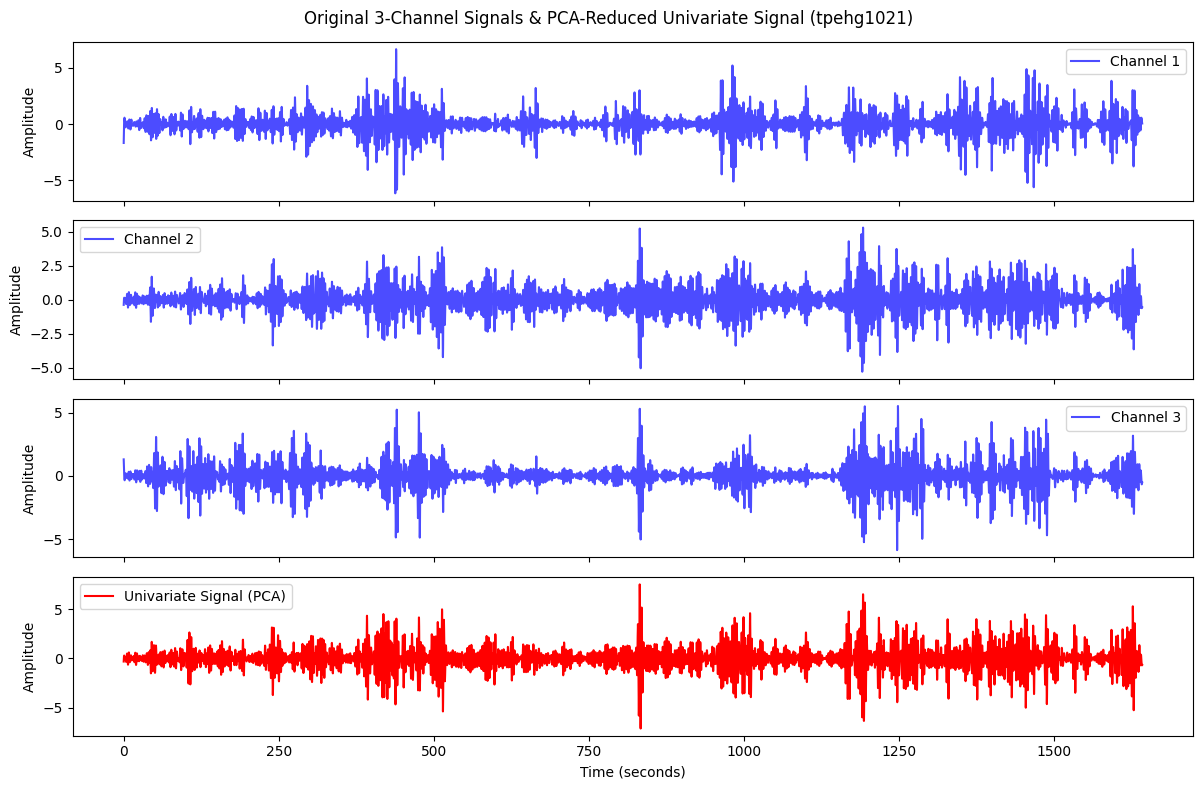

In [80]:
import numpy as np
import matplotlib.pyplot as plt

data_dir = os.path.join(processed_data_path, dataset + "_preprocessed.npy")
or_dat = np.load(data_dir, allow_pickle=True)
# Select an instance
instance = or_dat[1]  # Using the provided index 1
print('original fs', instance['metadata']['fs'])
record_name = instance['record_name']
original_signals = instance['signal']  # Multivariate signals
print(original_signals)
fs = instance['metadata']['fs']

# Find the corresponding univariate signal
univariate_instance = univariate_data[1]
print(instance['record_name'], univariate_instance['record_name'])
univariate_signal = univariate_instance['signal']

# Determine the number of channels
num_channels = original_signals.shape[1]
print(num_channels)
sequence_length = original_signals.shape[0]

# Create subplots (num_channels + 1 to include the univariate signal)
fig, axs = plt.subplots(num_channels + 1, 1, figsize=(12, 2 * (num_channels + 1)), sharex=True)
time_axis = np.arange(sequence_length) / fs  # Convert to seconds

# Plot all original channels
title = f"Original {num_channels}-Channel Signals & PCA-Reduced Univariate Signal ({record_name})"
for i in range(num_channels):
    axs[i].plot(time_axis, original_signals[:, i], label=f'Channel {i+1}', color='b', alpha=0.7)
    axs[i].legend()
    axs[i].set_ylabel("Amplitude")

# Plot the univariate signal in a distinct color
axs[num_channels].plot(time_axis, univariate_signal, label="Univariate Signal (PCA)", color='r')
axs[num_channels].legend()
axs[num_channels].set_ylabel("Amplitude")
axs[num_channels].set_xlabel("Time (seconds)")

fig.suptitle(title)
plt.tight_layout()
plt.show()


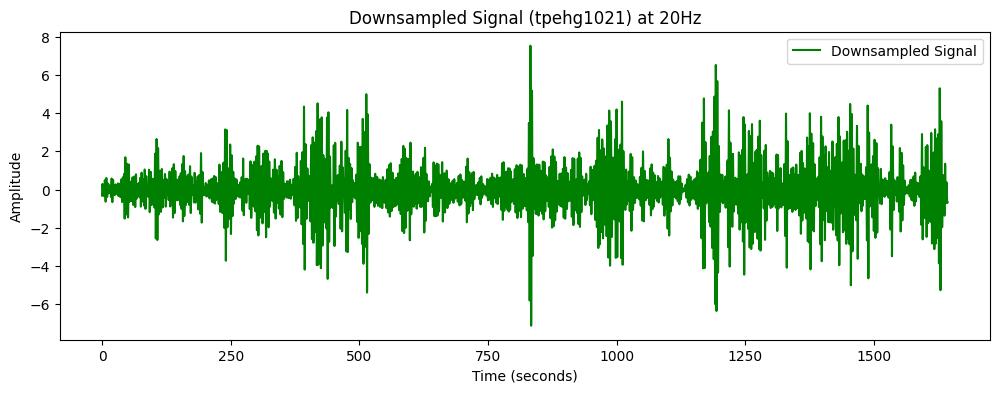

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Select the downsampled signal
downsampled_signal = downsampled_data[1]['signal']
record_name = downsampled_data[1]['record_name']

# Create time axis assuming uniform sampling
downsampled_fs = 20  # The new sampling frequency
downsampled_time_axis = np.arange(len(downsampled_signal)) / downsampled_fs

# Plot the downsampled signal
plt.figure(figsize=(12, 4))
plt.plot(downsampled_time_axis, downsampled_signal, label="Downsampled Signal", color='g')
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title(f"Downsampled Signal ({record_name}) at 20Hz")
plt.legend()
plt.show()


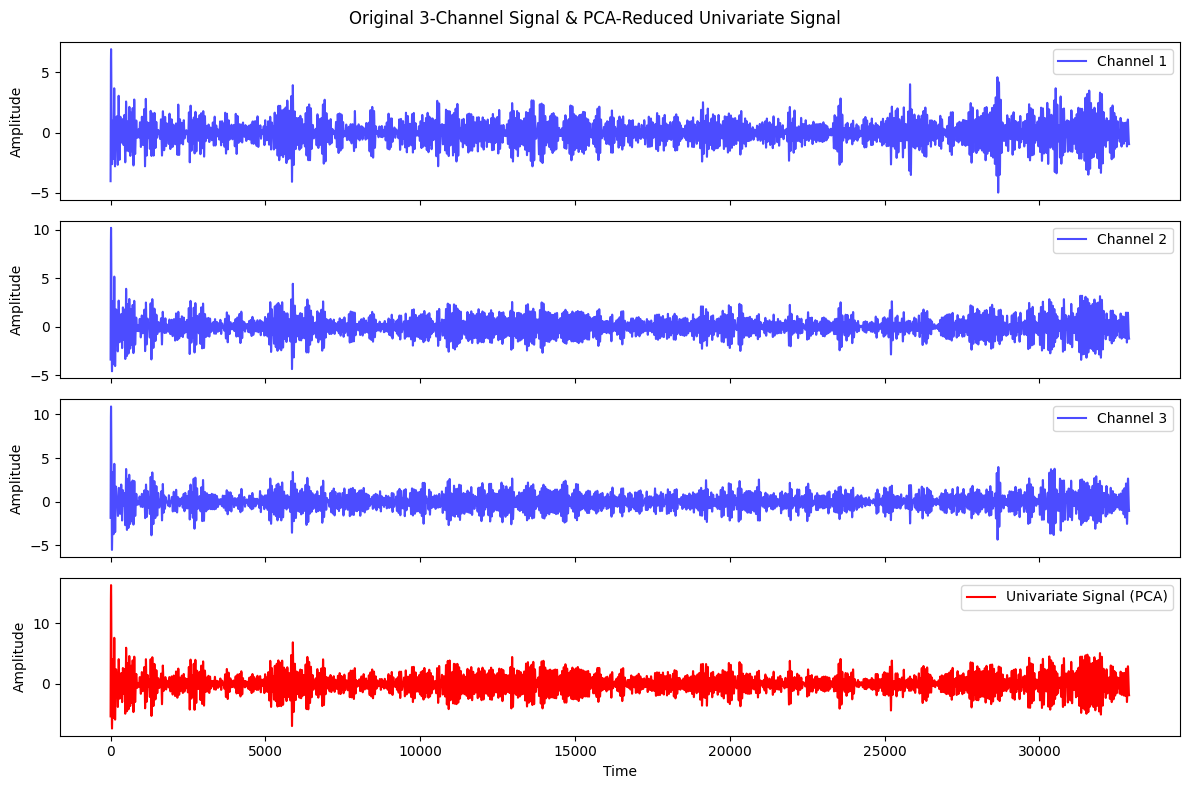

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Load dataset
data_path = os.path.join(univariate_data_path, dataset + "_univariate.npy")
data = np.load(data_path, allow_pickle=True)

# Select a random instance for visualization
random_instance = random.choice(data)
univariate_signal = random_instance['signal']  # Univariate after PCA

# Load the original dataset before PCA
original_data_path = os.path.join(processed_data_path, dataset + "_preprocessed.npy")
original_data = np.load(original_data_path, allow_pickle=True)

# Find the corresponding original signal
record_name = random_instance['record_name']
original_instance = next(entry for entry in original_data if entry['record_name'] == record_name)
original_multivariate_signal = original_instance['signal']  # Shape: (sequence_length, num_channels)

num_channels = original_multivariate_signal.shape[1]  

# Create subplots (num_channels + 1 to include the univariate signal)
fig, axs = plt.subplots(num_channels + 1, 1, figsize=(12, 2 * (num_channels + 1)), sharex=True)

time_axis = np.arange(original_multivariate_signal.shape[0])

# Plot all channels dynamically
for i in range(num_channels):
    axs[i].plot(time_axis, original_multivariate_signal[:, i], label=f'Channel {i+1}', color='b', alpha=0.7)
    axs[i].legend()
    axs[i].set_ylabel("Amplitude")

# Plot the univariate signal in a distinct color
axs[num_channels].plot(time_axis, univariate_signal, label="Univariate Signal (PCA)", color='r')
axs[num_channels].legend()
axs[num_channels].set_ylabel("Amplitude")
axs[num_channels].set_xlabel("Time")

fig.suptitle(f"Original {num_channels}-Channel Signal & PCA-Reduced Univariate Signal")
plt.tight_layout()
plt.show()
